# COVID-19, An Analysis

### Joshua Wentling

 data curation, parsing, and management; exploratory data analysis; hypothesis testing and machine learning to provide analysis; and then the curationof a message or messages covering insights learned during the tutorial.

•Identifies a raw data source<dl>•Processes and stores that data<dl>•Performs exploratory data analysis & visualization<dl>•Derives insight(s) using statistics and ML<dl>•Communicates those insights as actionable text

https://www.data.gov/<dl>https://cloud.google.com/bigquery/public-data/<dl>https://www.kaggle.com/datasets<dl>https://aws.amazon.com/public-datasets/

***

## Introduction

On December 31, 2019, the CDC became aware of a cluster of pneumonia cases in Wuhan, China. These, as we later learned, were the first known cases of COVID-19. By January 30, 2020, WHO declared the COVID-19 outbreak a global health emergency. By mid March, much of the U.S. was in lockdown and many state-wide stay-at-home orders were issued.
As of December 2020, the pandemic is growing still with an estimated over 74 million cases worldwide. It has been a rollercoaster of a year, but hopefully with the recent vaccine approvals we will see this pandemic come to an end soon. Until then, people around the world are encouraged to stay at home as much as possible and maintain social distancing measures.
<br><br>
It has been almost a year since the pandemic started. Thanks to the hard work of data scientists, we have data for confirmed cases, deaths, and recoveries for every country around the world for each day since this pandemic started. With that data, we can do a lot of analysis and learn more about how the virus has affected different countries (and different states/provinces within those countries) and possibly even build a model using machine learning based on this data.
This tutorial will walk you through the entire data science pipeline using data related to COVID-19, and hopefully by the end of it you will have learned a thing or two.

## Table of Contents

This page is broken up into two parts. The first is a more basic analysis on COVID-19 at the global scale and incorporates all the countries around the world that the dataset I used includes. The second part does this same analysis on COVID-19 within the United States on a state level, then it goes into a deeper analysis on the US including the development of a machine learning model. Much of the code from the first part is repeated in the second part, so I will be including less of an explanation for the repeated code to reduce redundancy.

- Data Import <br>
- **Global**
    - Initial Data Processing
    - Graph and Analysis
    - Choropleth
- **United States**
    - Graph and Analysis
    - Choropleth
    - Machine Leaning
- Conclusion

<hr>

## Imports

We will start with our imports. These are all the necessary libraries that we will be using for this tutorial.

In [1305]:
# !pip install folium
# !pip install geopandas
import pandas as pd
import folium
from folium import plugins
from folium.plugins import TimeSliderChoropleth
import branca.colormap as cm
import numpy as np
import math
from matplotlib.ticker import FormatStrFormatter
import matplotlib.ticker as mtick
import scipy
from scipy import stats
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Global

## Initial Data Processing

Next, we will import our data from a csv and take a look.

In [1243]:
# https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset
df = pd.read_csv('Data/Covid/covid_19_data.csv')

pd.set_option('display.max_rows', None)
df.head()

SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1      01/22/2020          Anhui  Mainland China  1/22/2020 17:00   
1    2      01/22/2020        Beijing  Mainland China  1/22/2020 17:00   
2    3      01/22/2020      Chongqing  Mainland China  1/22/2020 17:00   
3    4      01/22/2020         Fujian  Mainland China  1/22/2020 17:00   
4    5      01/22/2020          Gansu  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered  
0        1.0     0.0        0.0  
1       14.0     0.0        0.0  
2        6.0     0.0        0.0  
3        1.0     0.0        0.0  
4        0.0     0.0        0.0

In [1244]:
dftemp = df.copy()
dftemp = dftemp.groupby(['Country/Region', 'ObservationDate'], as_index=False).sum()
dftemp = dftemp.sort_values('Confirmed', ascending=False).drop_duplicates(['Country/Region'])
dftemp.sort_values(by=['Country/Region'], ascending=False).astype(str)

Country/Region ObservationDate       SNo   Confirmed  \
53007    occupied Palestinian territory      03/10/2020      4593        25.0   
53006                          Zimbabwe      12/06/2020    171890     10718.0   
52744                            Zambia      12/06/2020    171889     17916.0   
52480                             Yemen      12/06/2020    171888      2337.0   
52087                    Western Sahara      07/07/2020     58571        10.0   
51993                West Bank and Gaza      12/06/2020    171886     98038.0   
51737                           Vietnam      12/06/2020    171885      1366.0   
51418                         Venezuela      12/06/2020    171884    104442.0   
51150                      Vatican City      03/09/2020      4507         1.0   
51122                           Vanuatu      11/12/2020    153655         1.0   
51119                        Uzbekistan      12/06/2020    171882     74053.0   
50852                           Uruguay      12/06/2020    171881      7303.0   
50584              United Arab Emirates      12/06/2020    171880    176429.0   
50271                           Ukraine      12/06/2020   4649847    834913.0   
49992                            Uganda      12/06/2020    171879     22499.0   
49731                                US      12/06/2020   9987689  14757000.0   
49411                                UK      12/06/2020   2582103   1727751.0   
49100                            Turkey      12/06/2020    171878    828295.0   
48829                           Tunisia      12/06/2020    171877    104002.0   
48551               Trinidad and Tobago      12/06/2020    171876      6767.0   
48283                              Togo      12/06/2020    171875      3095.0   
48007                       Timor-Leste      12/06/2020    171874        31.0   
47743                        The Gambia      03/17/2020      6429         1.0   
47739                       The Bahamas      03/18/2020      6706         1.0   
47736                          Thailand      12/06/2020    171873      4107.0   
47351                          Tanzania      10/02/2020    123091       509.0   
47150                        Tajikistan      12/06/2020    171871     12428.0   
46929                            Taiwan      12/06/2020    171870       716.0   
46609                             Syria      12/06/2020    171869      8403.0   
46348                       Switzerland      12/05/2020    171108    344497.0   
46062                            Sweden      12/05/2020   3601190    278912.0   
45752                          Suriname      12/06/2020    171867      5324.0   
45484                             Sudan      12/06/2020    171866     19468.0   
45215                        St. Martin      03/09/2020      4412         2.0   
45214                         Sri Lanka      12/06/2020    171865     27877.0   
44897                             Spain      12/04/2020   3410888   1684647.0   
44589                       South Sudan      12/06/2020    171864      3181.0   
44343                       South Korea      12/06/2020    171863     38161.0   
44023                      South Africa      12/06/2020    171862    814565.0   
43743                           Somalia      12/03/2020    169581      4525.0   
43480                   Solomon Islands      12/06/2020    171860        17.0   
43424                          Slovenia      12/06/2020    171859     85805.0   
43147                          Slovakia      12/06/2020    171858    116731.0   
42871                         Singapore      12/06/2020    171857     58260.0   
42552                      Sierra Leone      12/06/2020    171856      2426.0   
42301                        Seychelles      12/06/2020    171855       184.0   
42033                            Serbia      12/06/2020    171854    219652.0   
41757                           Senegal      12/06/2020    171853     16477.0   
41477                      Saudi Arabia      12/06/2020 

## Graph and Analysis

Let's start by making a line graph of cases over time.

We'll make a copy of the original dataframe so that we can make edits for our line graph. The original dataset breaks the cases down by province/state. For this graph, we will just be looking at the data per country. To account for this, we will sum the data by country and oberservation date.

In [1245]:
dfl = df.copy()
# dfl = dfl.groupby(['Country/Region', 'ObservationDate'], as_index=False).sum()
# Get the sum of all confirmed cases in every country for each day
dfl = dfl.groupby(['ObservationDate'], as_index=False).sum()
# dfl = dfl[['Country/Region','ObservationDate','Confirmed']]
# Remove all unnecessary data
dfl = dfl[['ObservationDate','Confirmed']]
dfl.head()

ObservationDate  Confirmed
0      01/22/2020      555.0
1      01/23/2020      653.0
2      01/24/2020      941.0
3      01/25/2020     1438.0
4      01/26/2020     2118.0

In [1246]:
# Convert the observation date strings to a pd datetime
dfl['ObservationDate'] = dfl['ObservationDate'].apply(pd.to_datetime)
# Adjust the scale of case numbers to millions
dfl['Confirmed'] = dfl['Confirmed']/1000000
# Makes each column a different date for plotting
dfl = dfl.set_index('ObservationDate')

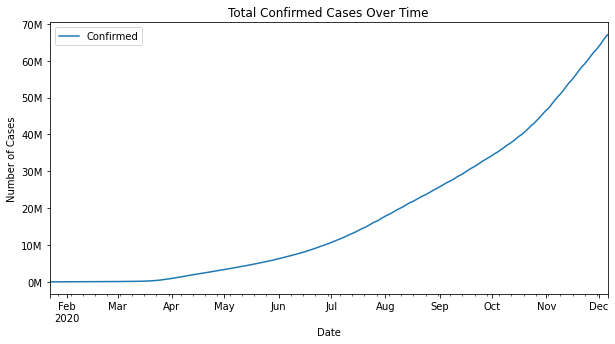

In [1247]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,5)

ax = dfl.plot()
ax.set_xlabel('Date')
ax.set_ylabel('Number of Cases')
ax.set_title('Total Confirmed Cases Over Time')

formatter = FormatStrFormatter('%0.0fM')
ax.yaxis.set_major_formatter(formatter) 

Let's choose a few specific countries to see how their confirmed cases compare

In [1248]:
dftemp = df.copy()
dftemp = dftemp.groupby(['Country/Region', 'ObservationDate'], as_index=False).sum()
dftemp = dftemp.sort_values('Confirmed', ascending=False).drop_duplicates(['Country/Region'])
dftemp = dftemp.sort_values(by=['Confirmed'], ascending=False).astype(str).head(7)
dftemp

Country/Region ObservationDate       SNo   Confirmed    Deaths  \
49731             US      12/06/2020   9987689  14757000.0  282299.0   
21902          India      12/06/2020   6370326   9677203.0  140573.0   
6676          Brazil      12/06/2020   4648893   6603540.0  176941.0   
39600         Russia      12/06/2020  14293198   2439163.0   42675.0   
16846         France      12/06/2020   1893885   2345648.0   55247.0   
23645          Italy      12/06/2020   3616285   1728878.0   60078.0   
49411             UK      12/06/2020   2582103   1727751.0   61342.0   

       Recovered  
49731  5624444.0  
21902  9139901.0  
6676   5866657.0  
39600  1920744.0  
16846   175220.0  
23645   913494.0  
49411     3736.0

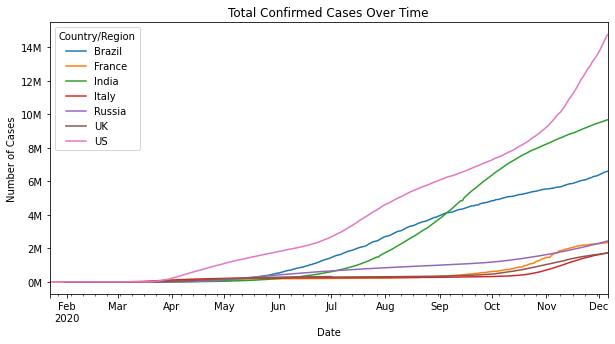

In [1249]:
dfl = df.copy()

# Select the countries we want to see
country_list = dftemp['Country/Region'].tolist()
dfl = dfl.loc[dfl['Country/Region'].isin(country_list)]


# Repeat steps from last line graph
dfl = dfl.groupby(['Country/Region', 'ObservationDate'], as_index=False).sum()

# Remove all unnecessary data
df_confirmed = dfl.copy()
df_confirmed = df_confirmed[['Country/Region','ObservationDate','Confirmed']]
# Convert the observation date strings to a pd datetime
df_confirmed['ObservationDate'] = df_confirmed['ObservationDate'].apply(pd.to_datetime)
# Adjust the scale of case numbers to millions
# dfl['Confirmed'] = dfl['Confirmed'].apply(lambda x: math.log10(.01+x))
df_confirmed['Confirmed'] = df_confirmed['Confirmed']/1000000
# Adjust dataframe for plotting
df_confirmed = df_confirmed.pivot(index='ObservationDate', columns='Country/Region', values='Confirmed')
# dfl = dfl.set_index('ObservationDate')

plt.rcParams["figure.figsize"] = (10,5)

ax = df_confirmed.plot()
ax.set_xlabel('Date')
ax.set_ylabel('Number of Cases')
ax.set_title('Total Confirmed Cases Over Time')

formatter = FormatStrFormatter('%0.0fM')
ax.yaxis.set_major_formatter(formatter)

Let's take a look at the same graph but for deaths instead of total cases.

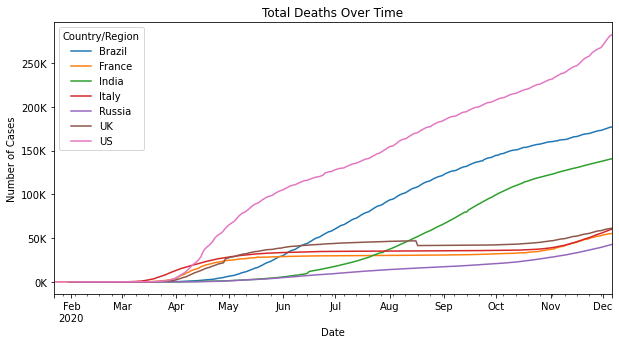

In [1250]:
df_deaths = dfl.copy()
df_deaths = df_deaths[['Country/Region','ObservationDate','Deaths']]
# Convert the observation date strings to a pd datetime
df_deaths['ObservationDate'] = df_deaths['ObservationDate'].apply(pd.to_datetime)
# Adjust the scale of case numbers to millions
# dfl['Confirmed'] = dfl['Confirmed'].apply(lambda x: math.log10(.01+x))
df_deaths['Deaths'] = df_deaths['Deaths']/1000
# Adjust dataframe for plotting
df_deaths = df_deaths.pivot(index='ObservationDate', columns='Country/Region', values='Deaths')
# dfl = dfl.set_index('ObservationDate')

plt.rcParams["figure.figsize"] = (10,5)

ax = df_deaths.plot()
ax.set_xlabel('Date')
ax.set_ylabel('Number of Cases')
ax.set_title('Total Deaths Over Time')

formatter = FormatStrFormatter('%0.0fK')
ax.yaxis.set_major_formatter(formatter)

While this graph is interesting, it doesn't tell us a whole lot about how each of these countries have handled the outbreak overall, since a country with a smaller population is far less likely to make it onto this list, even if a large percentage of the population was infected. Let's redo this analysis using cases as a percentage of the country's total population.

In [1251]:
# Data from: https://population.un.org/wpp/Download/Standard/CSV/
df_pop = pd.read_csv('Data/WPP2019_TotalPopulationBySex.csv')
# We only want data for 2020
df_pop = df_pop[df_pop['Time'] == 2020]
# We want just one row per country
df_pop = df_pop.groupby(['Location', 'Time'], as_index=False).mean()
# Get rid of unnecessary columns
df_pop = df_pop[['Location','PopTotal']]
# Population is in thousands, let's fix that
df_pop['PopTotal'] = df_pop['PopTotal']*1000

# Rename 'Location' to 'Country/Region' so the merge works properly
df_pop = df_pop.rename(columns={'Location': 'Country/Region'})

Now we have a list of countries and population totals for the year 2020! Next we will want to merge this with our existing dataframe. We will use a left merge on the existing dataframe (since that's the most important one) and then take a look to see if we're missing any population data.

First we must see if there is any missing data. Using the code below, we will display only the countries whose population total is NaN, meaning that it did not merge properly with our population data.

In [1252]:
# We will not be keeping this dataframe, hence why I used 'dftemp'
dftemp = df.copy()
# Left merge because we only care about countries that we have covid data for
dftemp = dftemp.merge(df_pop, on='Country/Region', how='left')
dftemp = dftemp[np.isnan(dftemp['PopTotal'])]
dftemp.groupby(['Country/Region'], as_index=False).mean()

Country/Region            SNo      Confirmed  \
0                       Azerbaijan    2664.000000       1.000000   
1                  ('St. Martin',)    4675.000000       2.000000   
2                     Bahamas, The    7253.666667       3.333333   
3                          Bolivia   76018.431734   69601.712177   
4                           Brunei   75495.948718     137.062271   
5                            Burma   80369.188235   15417.839216   
6                       Cape Verde    7585.000000       1.000000   
7              Congo (Brazzaville)   77094.973783    2761.700375   
8                 Congo (Kinshasa)   76033.948339    6831.221402   
9                          Curacao    5733.000000       1.000000   
10                  Czech Republic   73456.234875   90518.960854   
11                Diamond Princess   79827.649805     712.000000   
12                      East Timor    7589.000000       1.000000   
13                     Gambia, The    7141.750000       1.000000   
14                        Guernsey    6587.625000       0.375000   
15                       Hong Kong   64881.081250    2548.284375   
16                            Iran   70799.890411  305572.263699   
17                     Ivory Coast   75796.937500   11618.933824   
18                          Jersey    6579.000000       0.750000   
19                          Kosovo   78191.965779   10219.840304   
20                            Laos   79594.158915      21.120155   
21                      MS Zaandam   80718.622047       8.889764   
22                           Macau   64943.078125      38.390625   
23                  Mainland China   64959.045170    2546.921053   
24                         Moldova   75313.996350   32699.087591   
25                   North Ireland    2685.000000       1.000000   
26                          Others    3427.391304     570.173913   
27                       Palestine    3870.800000      17.200000   
28             Republic of Ireland    4067.000000      21.000000   
29           Republic of the Congo    6873.833333       0.166667   
30                         Reunion    6116.272727      12.454545   
31                          Russia  101297.522550   14182.890758   
32                Saint Barthelemy    3953.571429       2.428571   
33                     South Korea   64732.831250   14912.893750   
34                      St. Martin    4412.000000       2.000000   
35                           Syria   79107.211538    2273.242308   
36                          Taiwan   64744.350000     394.481250   
37                        Tanzania   77479.751880     438.026316   
38                     The Bahamas    6871.333333       0.500000   
39                      The Gambia    7019.000000       0.200000   
40                              UK   83280.639692   33870.759427   
41                              US   72297.957352   76987.073582   
42                    Vatican City    4124.000000       1.000000   
43                       Venezuela   76953.477612   35674.694030   
44                         Vietnam   64960.526646     576.670846   
45              West Bank and Gaza   80231.511719   22473.257812   
46  occupied Palestinian territory    5543.285714       3.571429   

          Deaths      Recovered  PopTotal  
0       0.000000       0.000000       NaN  
1       0.000000       0.000000       NaN  
2       0.000000       0.000000       NaN  
3    3722.612546   43647.557196       NaN  
4       2.278388     124.380952       NaN  
5     345.650980   10150.203922       NaN  
6       0.000000       0.000000       NaN  
7      52.258427    1728.322097       NaN  
8     176.136531    5322.457565       NaN  
9       0.000000       0.000000       NaN  
10   1229.569395   59609.946619       NaN  
11     12.805447     649.626459       NaN  
12      0.000000       0.000000       NaN  
13      0.000000       0.000000       NaN  
14      0.000000       0.000000       NaN  
15     40.859375    2207.271875       NaN  
16  167

Using this list, let's fill in as much of the missing data as we can. Unfortunately, we will not have data for every single country. However, smaller countries with little or no data likely won't have an effect on the analysis we are doing.

In [1253]:
df_pop = df_pop.replace({'Country/Region':'Russian Federation'},'Russia')
df_pop = df_pop.replace({'Country/Region':'United States of America'},'US')
df_pop = df_pop.replace({'Country/Region':'Iran (Islamic Republic of)'},'Iran')
df_pop = df_pop.replace({'Country/Region':'Bahamas'},'Bahamas, The')
df_pop = df_pop.replace({'Country/Region':'Azerbaijan'},'Azerbaijan')
df_pop = df_pop.replace({'Country/Region':'United Kingdom'},'UK')
df_pop = df_pop.replace({'Country/Region':'Bolivia (Plurinational State of)'},'Bolivia')
df_pop = df_pop.replace({'Country/Region':'Brunei Darussalam'},'Brunei')
df_pop = df_pop.replace({'Country/Region':'Democratic Republic of the Congo'},'Congo (Kinshasa)')
df_pop = df_pop.replace({'Country/Region':'Congo'},'Congo (Brazzaville)')
df_pop = df_pop.replace({'Country/Region':'Curaçao'},'Curacao')
df_pop = df_pop.replace({'Country/Region':'Czechia'},'Czech Republic')
df_pop = df_pop.replace({'Country/Region':'Timor-Leste'},'East Timor')
df_pop = df_pop.replace({'Country/Region':'China, Hong Kong SAR'},'Hong Kong')
df_pop = df_pop.replace({'Country/Region':'China'},'Mainland China')
df_pop = df_pop.replace({'Country/Region':'Republic of Korea'},'South Korea')
df_pop = df_pop.replace({'Country/Region':'China, Taiwan Province of China'},'Taiwan')
df_pop = df_pop.replace({'Country/Region':'United Republic of Tanzania'},'Tanzania')
df_pop = df_pop.replace({'Country/Region':'Venezuela (Bolivarian Republic of)'},'Venezuela')

Then we can run our merge code again.

In [1254]:
df_merge = df.copy()
df_merge = df_merge.merge(df_pop, on='Country/Region', how='left')

Finally, let's add a column that is confirmed cases divided by the population total to get us a confirmed percentage for each country.

In [1255]:
df_merge['ConfirmedPercentage'] = df_merge['Confirmed']/df_merge['PopTotal']*100
df_merge.head()

SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1      01/22/2020          Anhui  Mainland China  1/22/2020 17:00   
1    2      01/22/2020        Beijing  Mainland China  1/22/2020 17:00   
2    3      01/22/2020      Chongqing  Mainland China  1/22/2020 17:00   
3    4      01/22/2020         Fujian  Mainland China  1/22/2020 17:00   
4    5      01/22/2020          Gansu  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered      PopTotal  ConfirmedPercentage  
0        1.0     0.0        0.0  1.439324e+09         6.947707e-08  
1       14.0     0.0        0.0  1.439324e+09         9.726790e-07  
2        6.0     0.0        0.0  1.439324e+09         4.168624e-07  
3        1.0     0.0        0.0  1.439324e+09         6.947707e-08  
4        0.0     0.0        0.0  1.439324e+09         0.000000e+00

***

## Confirmed Cases as Percentage of Population

Now let's do some analysis using our new ConfirmedPercentage category.

We'll start with another line graph. Let's see if our top 5 countries are the same using ConfirmedPercentage instead of Confirmed.

In [1256]:
dftemp = df_merge.copy()
dftemp = dftemp.groupby(['Country/Region', 'ObservationDate'], as_index=False).sum()
dftemp = dftemp.sort_values('ConfirmedPercentage', ascending=False).drop_duplicates(['Country/Region'])
dftemp = dftemp.sort_values(by=['ConfirmedPercentage'], ascending=False).astype(str).head(7)
dftemp

Country/Region ObservationDate      SNo Confirmed   Deaths Recovered  \
1127          Andorra      12/06/2020   171724    7050.0     78.0    6238.0   
33049      Montenegro      12/06/2020   171826   38246.0    533.0   26999.0   
28550      Luxembourg      12/06/2020   171812   37017.0    345.0   28029.0   
40951      San Marino      12/05/2020   171090    1789.0     48.0    1412.0   
3660          Bahrain      12/06/2020   171732   87930.0    341.0   86030.0   
12408  Czech Republic      12/06/2020   171759  546833.0   8902.0  478094.0   
4789          Belgium      12/06/2020  2066058  591756.0  17320.0       0.0   

                 PopTotal ConfirmedPercentage  
1127              77265.0     9.1244418559503  
33049            628062.0   6.089526193273912  
28550   625975.9999999999   5.913485501041574  
40951   33937.99999999999   5.271377217278568  
3660   1701582.9999999998  5.1675410485412705  
12408  10708982.000000002   5.106302354416133  
4789   139075392.00000003  5.1059155022910145

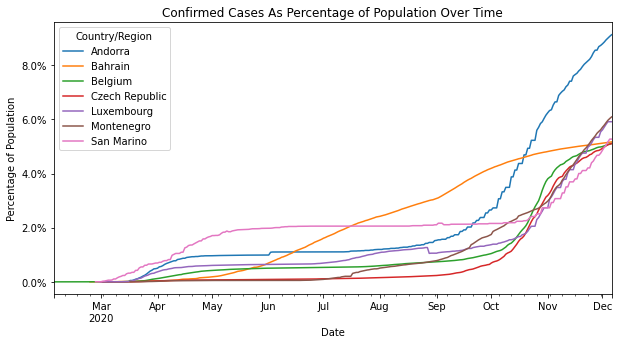

In [1257]:
import matplotlib.ticker as mtick

dfl = df_merge.copy()

# Select the countries we want to see
# country_list = ['US','India','Brazil','Russia','France','Italy']
# country_list = ['Andorra','Montenegro','Luxembourg','San Marino','Bahrain','Czech Republic','Belgium','Qatar','Armenia','US']
country_list = dftemp['Country/Region'].tolist()
dfl = dfl.loc[dfl['Country/Region'].isin(country_list)]


# Repeat steps from last line graph
dfl = dfl.groupby(['Country/Region', 'ObservationDate'], as_index=False).sum()

# Remove all unnecessary data
df_confirmed = dfl.copy()
df_confirmed = df_confirmed[['Country/Region','ObservationDate','ConfirmedPercentage']]
# Convert the observation date strings to a pd datetime
df_confirmed['ObservationDate'] = df_confirmed['ObservationDate'].apply(pd.to_datetime)
# Adjust the scale of case numbers to millions
# dfl['Confirmed'] = dfl['Confirmed'].apply(lambda x: math.log10(.01+x))
# df_confirmed['ConfirmedPercentage'] = df_confirmed['ConfirmedPercentage']/1000000
# Adjust dataframe for plotting
df_confirmed = df_confirmed.pivot(index='ObservationDate', columns='Country/Region', values='ConfirmedPercentage')
# dfl = dfl.set_index('ObservationDate')

plt.rcParams["figure.figsize"] = (10,5)

ax = df_confirmed.plot()
ax.set_xlabel('Date')
ax.set_ylabel('Percentage of Population')
ax.set_title('Confirmed Cases As Percentage of Population Over Time')

formatter = mtick.PercentFormatter()
ax.yaxis.set_major_formatter(formatter)

This change to percentage of population gives us a bit more perspective. While the US is still in the top 10, it shows that their are a number of other countries with worse case rates relative to their total population. Andorra has a signficantly higher percentage than any other country at around 9%.

***

## Choropleth

Next, we will be making a time-based choropleth to illustrate the spread of the virus over time. There are a few different use cases and ways we can display our data using a time slider choropleth. To start, we will use it to show the overall spread of the virus over time from its beginning last January 2020 until early December of 2020. 

I used the following website as a reference to better understand TimeSliderChoropleth. Some of its parameters such as styledict, have very little documentation. From: https://www.jumpingrivers.com/blog/interactive-maps-python-covid-19-spread/

We will start by simply making a copy of the dataframe so we can make modification to it specific to the time slider choropleth.

In [1352]:
# dfc: Data frame choropleth
dfc = df.copy()
# dfc = dfc.dropna(how='all')
# dfc = dfc[dfc.Confirmed != 0]

Some countries have different labels than our geography database (which we will get to below). We must fix these labels so that they match.

In [1353]:
dfc[dfc['Country/Region'].str.contains('Congo')]

SNo ObservationDate Province/State         Country/Region  \
4903      4904      03/11/2020            NaN       Congo (Kinshasa)   
5124      5125      03/12/2020            NaN       Congo (Kinshasa)   
5207      5208      03/13/2020            NaN       Congo (Kinshasa)   
5582      5583      03/14/2020            NaN       Congo (Kinshasa)   
5839      5840      03/15/2020            NaN       Congo (Kinshasa)   
5858      5859      03/15/2020            NaN    Congo (Brazzaville)   
6114      6115      03/16/2020            NaN       Congo (Kinshasa)   
6130      6131      03/16/2020            NaN    Congo (Brazzaville)   
6146      6147      03/16/2020            NaN  Republic of the Congo   
6384      6385      03/17/2020            NaN       Congo (Kinshasa)   
6410      6411      03/17/2020            NaN    Congo (Brazzaville)   
6436      6437      03/17/2020            NaN  Republic of the Congo   
6660      6661      03/18/2020            NaN       Congo (Kinshasa)   
6691      6692      03/18/2020            NaN    Congo (Brazzaville)   
6720      6721      03/18/2020            NaN  Republic of the Congo   
6914      6915      03/19/2020            NaN       Congo (Kinshasa)   
6955      6956      03/19/2020            NaN    Congo (Brazzaville)   
7011      7012      03/19/2020            NaN  Republic of the Congo   
7206      7207      03/20/2020            NaN       Congo (Kinshasa)   
7256      7257      03/20/2020            NaN    Congo (Brazzaville)   
7310      7311      03/20/2020            NaN  Republic of the Congo   
7504      7505      03/21/2020            NaN       Congo (Kinshasa)   
7559      7560      03/21/2020            NaN    Congo (Brazzaville)   
7614      7615      03/21/2020            NaN  Republic of the Congo   
7648      7649      03/22/2020            NaN    Congo (Brazzaville)   
7649      7650      03/22/2020            NaN       Congo (Kinshasa)   
7948      7949      03/23/2020            NaN    Congo (Brazzaville)   
7949      7950      03/23/2020            NaN       Congo (Kinshasa)   
8243      8244      03/24/2020            NaN    Congo (Brazzaville)   
8244      8245      03/24/2020            NaN       Congo (Kinshasa)   
8542      8543      03/25/2020            NaN    Congo (Brazzaville)   
8543      8544      03/25/2020            NaN       Congo (Kinshasa)   
8845      8846      03/26/2020            NaN    Congo (Brazzaville)   
8846      8847      03/26/2020            NaN       Congo (Kinshasa)   
9153      9154      03/27/2020            NaN    Congo (Brazzaville)   
9154      9155      03/27/2020            NaN       Congo (Kinshasa)   
9461      9462      03/28/2020            NaN    Congo (Brazzaville)   
9462      9463      03/28/2020            NaN       Congo (Kinshasa)   
9773      9774      03/29/2020            NaN    Congo (Brazzaville)   
9774      9775      03/29/2020            NaN       Congo (Kinshasa)   
10086    10087      03/30/2020            NaN    Congo (Brazzaville)   
10087    10088      03/30/2020            NaN       Congo (Kinshasa)   
10400    10401      03/31/2020            NaN    Congo (Brazzaville)   
10401    10402      03/31/2020            NaN       Congo (Kinshasa)   
10714    10715      04/01/2020            NaN    Congo (Brazzaville)   
10715    10716      04/01/2020            NaN       Congo (Kinshasa)   
11028    11029      04/02/2020            NaN    Congo (Brazzaville)   
11029    11030      04/02/2020            NaN       Congo (Kinshasa)   
11344    11345      04/03/2020            NaN    Congo (Brazzaville)   
11345    11346      04/03/2020            NaN       Congo (Kinshasa)   
11660    11661      04/04/2020            NaN    Congo (Brazzaville)   
11661    11662      04/04/2020            NaN       Congo (Kinshasa)   
11977    11978      04/05/2020            NaN    Congo (Brazzaville)   
11978    11979      04/05/2020            NaN       Congo (Kinshasa)   
12297    12298      04/06/2020            NaN    Co

In [1354]:
dfc = dfc.replace({'Country/Region':'US'},'United States of America')
dfc = dfc.replace({'Country/Region':'Mainland China'},'China')
dfc = dfc.replace({'Country/Region':'UK'},'United Kingdom')
dfc = dfc.replace({'Country/Region':'Republic of the Congo'},'Congo (Brazzaville)')

Some countries are broken down by province/state. This means that the data is dispersed throughout these regions. Our geographic data only accounts for countries, so we will have to sum the data for the country as a whole.

In [1355]:
dfc = dfc.groupby(['Country/Region', 'ObservationDate'], as_index=False).sum()

In [1356]:
# Convert time to proper format for TimeSliderChoropleth
dfc['ObservationDate'] = pd.to_datetime(dfc['ObservationDate']).astype(int) / 10**9

# Take log of data since some countries have significantly high populations than others
dfc['Confirmed Adjusted'] = dfc['Confirmed'].apply(lambda x: math.log10(1+x)) # Add 1 to account for zeros

Next we need to calculate the color data for the TimeSliderChoropleth. This color map will evenly distribute a range of color hex's across a dataframe column based on their values. In this case, the color map is being applied to the number of confirmed cases. The specific color map used doesn't affect the data, just the colors used in the map.

In [1357]:
max_color = max(dfc['Confirmed Adjusted'])
min_color = min(dfc['Confirmed Adjusted'])
cmap = cm.linear.YlOrRd_09.scale(min_color, max_color)
dfc['Color'] = dfc['Confirmed Adjusted'].apply(cmap)

First we must get the geography data for all countries. This is done using the geopandas dataset. Found here: https://nbviewer.jupyter.org/github/python-visualization/folium/blob/master/examples/TimeSliderChoropleth.ipynb

In [1358]:
import geopandas as gpd
assert "naturalearth_lowres" in gpd.datasets.available
datapath = gpd.datasets.get_path("naturalearth_lowres")
gdf = gpd.read_file(datapath)

Next, we must create a style dictionary to store the color and opacity values for each date for each country. This is stored as a dictionary of dictionaries. Each entry in the dictionary correlates to a country and then the inner dictionary contains color values for each date.
<br><br>
A styledict is defined as: A dictionary where the keys are the geojson feature ids and the values are dicts of {time: style_options_dict}

In [1359]:
styledict = {}

for index, row in gdf.iterrows():
    cdata = dfc[dfc['Country/Region'] == row['name']]
    temp_dict = {}
    
    for i, r in cdata.iterrows():
        temp_dict[str(r['ObservationDate'])] = {'color': r['Color'], 'opacity': 0.8}

    styledict[str(index)] = temp_dict

Finally, we need to create the folium map. Note that I was unable to map the data properly for a couple countries. Those countries will stay white even after adjusting the slider.

In [1360]:
map_osm = folium.Map(min_zoom=2, max_bounds=True)

g = TimeSliderChoropleth(
    data=gdf.to_json(),
    styledict=styledict,
).add_to(map_osm)

_ = cmap.add_to(map_osm)

map_osm

***

# United States

As a US citizen who is much more familiar with the scope of political, legal, and cultural differences in different areas throughout the country, I would love to take a look at how COVID-19 has affected different states within the US. This analysis could easily be done using state or provincial data in another country. For this tutorial, I will use the US. I also believe the US is a great country to do this on because there are vast changes in population density, climate, and culture from state to state. I would love to do some analysis to see if we can find any statistically significant correlation between any of these factors and the rates of cases for COVID-19. Let's get started!

## Graph and Analysis

First we will need to create a dataframe with just the data for each US state.

In [1266]:
df_us = df.copy()
df_us = df_us[df_us['Country/Region']=='US']

Next, we will repeat the steps above to create a line graph for the top worst states in terms of cases. I won't include explantations since we have already done all this above.

In [1267]:
dftemp = df_us.copy()
dftemp = dftemp.groupby(['Province/State', 'ObservationDate'], as_index=False).sum()
dftemp = dftemp.sort_values('Confirmed', ascending=False).drop_duplicates(['Province/State'])
dftemp = dftemp.sort_values(by=['Confirmed'], ascending=False).astype(str).head(7)

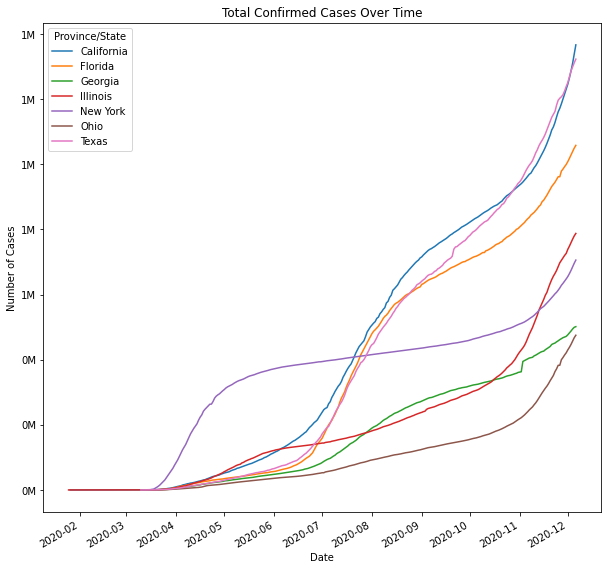

In [1268]:
dfl = df_us.copy()

# Repeat steps from last line graph
dfl = dfl.groupby(['Province/State', 'ObservationDate'], as_index=False).sum()

# Save current dataframe for later
df_tot = dfl.copy()

# Select the countries we want to see
state_list = dftemp['Province/State'].tolist()
dfl = dfl.loc[dfl['Province/State'].isin(state_list)]

# Remove all unnecessary data
df_confirmed = dfl.copy()

df_confirmed = df_confirmed[['Province/State','ObservationDate','Confirmed']]
# Convert the observation date strings to a pd datetime
df_confirmed['ObservationDate'] = df_confirmed['ObservationDate'].apply(pd.to_datetime)
# Adjust the scale of case numbers to millions
# dfl['Confirmed'] = dfl['Confirmed'].apply(lambda x: math.log10(.01+x))
df_confirmed['Confirmed'] = df_confirmed['Confirmed']/1000000
# Adjust dataframe for plotting
df_confirmed = df_confirmed.pivot(index='ObservationDate', columns='Province/State', values='Confirmed')
# dfl = dfl.set_index('ObservationDate')

plt.rcParams["figure.figsize"] = (10,10)

ax = df_confirmed.plot()
ax.set_xlabel('Date')
ax.set_ylabel('Number of Cases')
ax.set_title('Total Confirmed Cases Over Time')

formatter = FormatStrFormatter('%0.0fM')
ax.yaxis.set_major_formatter(formatter)

Unsurprisingly, some of the US's most populous states have the most cases. While this is interesting to see graphically, I would be more interested in seeing how the different states compare relative to each other. I believe the best way to do this is to look at the proportion of people in each state who tested positive for COVID-19. To do this, we can import and merge total population data for each state and calculate the percentage of people in each state who have been infected.

In [1269]:
# https://population.un.org/wpp/Download/Standard/CSV/
df_pop = pd.read_csv('Data/State Populations.csv')
# df_pop = df_pop.drop([1,2,3,4])
# df_pop = df_pop[df_pop['Time'] == 2020]
# df_pop = df_pop.groupby(['Location', 'Time'], as_index=False).mean()
# df_pop = df_pop[['Location','PopTotal']]
# # Population is in thousands, let's fix that
# df_pop['PopTotal'] = df_pop['PopTotal']*1000

# # Rename 'Location' to 'Country/Region' so the merge works properly
df_pop = df_pop.rename(columns={'State': 'Province/State'})
df_pop = df_pop.rename(columns={'2018 Population': 'PopTotal'})

df_pop.head(10)

Province/State  PopTotal
0      California  39776830
1           Texas  28704330
2         Florida  21312211
3        New York  19862512
4    Pennsylvania  12823989
5        Illinois  12768320
6            Ohio  11694664
7         Georgia  10545138
8  North Carolina  10390149
9        Michigan   9991177

Now that we have the data organized nicely, let's merge this with our existing data and calculated the confirmed percentage.

In [1270]:
df_merge = df_us.copy()
df_merge = df_merge.merge(df_pop, on='Province/State', how='inner')

df_merge['ConfirmedPercentage'] = df_merge['Confirmed']/df_merge['PopTotal']*100
df_merge.tail(10)

SNo ObservationDate Province/State Country/Region  \
13887  165057      11/27/2020        Alabama             US   
13888  165817      11/28/2020        Alabama             US   
13889  166577      11/29/2020        Alabama             US   
13890  167337      11/30/2020        Alabama             US   
13891  168097      12/01/2020        Alabama             US   
13892  168857      12/02/2020        Alabama             US   
13893  169617      12/03/2020        Alabama             US   
13894  170377      12/04/2020        Alabama             US   
13895  171137      12/05/2020        Alabama             US   
13896  171897      12/06/2020        Alabama             US   

               Last Update  Confirmed  Deaths  Recovered  PopTotal  \
13887  2020-11-28 05:25:50   242874.0  3572.0        0.0   4888949   
13888  2020-11-29 05:25:55   244993.0  3572.0        0.0   4888949   
13889  2020-11-30 05:26:13   247229.0  3577.0        0.0   4888949   
13890  2020-12-01 05:26:18   249524.0  3578.0        0.0   4888949   
13891  2020-12-02 05:27:41   252900.0  3638.0        0.0   4888949   
13892  2020-12-03 05:28:22   256828.0  3711.0        0.0   4888949   
13893  2020-12-04 05:27:27   260359.0  3776.0        0.0   4888949   
13894  2020-12-05 05:27:36   264199.0  3831.0        0.0   4888949   
13895  2020-12-06 05:26:18   267589.0  3877.0        0.0   4888949   
13896  2020-12-07 05:26:14   269877.0  3889.0        0.0   4888949   

       ConfirmedPercentage  
13887             4.967816  
13888             5.011159  
13889             5.056895  
13890             5.103837  
13891             5.172891  
13892             5.253235  
13893             5.325460  
13894             5.404004  
13895             5.473344  
13896             5.520143

Perfect. Since we only need the total number of confirmed cases for this analysis, we will drop all rows aside from the most recent one (since the number of confirmed cases in the table is cumulative).

In [1271]:
dftemp = df_merge.copy()
# dftemp = dftemp.groupby(['Province/State', 'ObservationDate'], as_index=False).mean()
dftemp = dftemp.sort_values('ConfirmedPercentage', ascending=False).drop_duplicates(['Province/State'])
dftemp = dftemp.sort_values(by=['ConfirmedPercentage'], ascending=False).astype(str).head(7)

Now, we can run the code to create a table using our new confirmed percentage column to see which states have the highest percentage of covid cases.

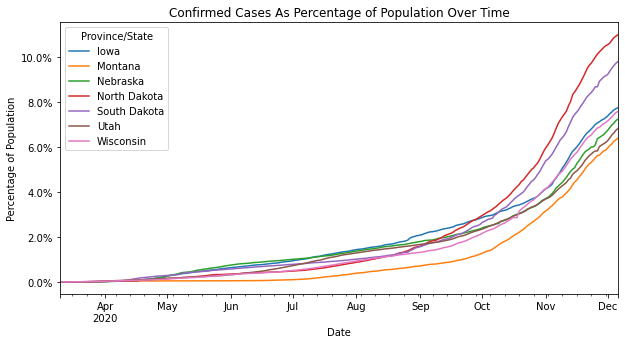

In [1272]:
# dfl: dataframe line (graph)
dfl = df_merge.copy()

# Select the countries we want to see
country_list = dftemp['Province/State'].tolist()
# dfl = dfl.loc[dfl['Province/State'].isin(country_list)]


# Repeat steps from last line graph
dfl = dfl.groupby(['Province/State', 'ObservationDate'], as_index=False).sum()

# Remove all unnecessary data
df_confirmed = dfl.copy()
df_confirmed = df_confirmed[['Province/State','ObservationDate','ConfirmedPercentage']]

# Convert the observation date strings to a pd datetime
df_confirmed['ObservationDate'] = df_confirmed['ObservationDate'].apply(pd.to_datetime)
# Adjust the scale of case numbers to millions
# dfl['Confirmed'] = dfl['Confirmed'].apply(lambda x: math.log10(.01+x))
# df_confirmed['ConfirmedPercentage'] = df_confirmed['ConfirmedPercentage']/1000000
# Adjust dataframe for plotting
df_plot = df_confirmed.copy()
df_plot = df_plot.loc[dfl['Province/State'].isin(country_list)]
df_plot = df_plot.pivot(index='ObservationDate', columns='Province/State', values='ConfirmedPercentage')
# dfl = dfl.set_index('ObservationDate')

plt.rcParams["figure.figsize"] = (10,5)

ax = df_plot.plot()
ax.set_xlabel('Date')
ax.set_ylabel('Percentage of Population')
ax.set_title('Confirmed Cases As Percentage of Population Over Time')

formatter = mtick.PercentFormatter()
ax.yaxis.set_major_formatter(formatter)

This is much more interesting! This new graph shows the top 7 states with the highest percentages of covid cases. This is very different from our original graph which showcased the overall number of cases.

***

## Machine Learning

For the last part of this tutorial, let's develop a machine learning model to see if we can use a variety of different factors to accurately predict the amount of covid cases in each state. For this tutorial, we will be doing multiple linear regression model with statsmodel.

### Finding Good Variables

In order to create an effective model, we must first gather some more data unique to each state that we believe might have an impact on its rates of COVID-19. There are a number of different possible datasets that could provide useful for this machine learning model. I have researched and selected datasets that I believed would be the most useful, however, this could certainly be expanded on.

### Political Ideology

The COVID-19 pandemic has caused some significant and rapid changes in the way that we live our lives in order to be as safe as possible. Along with this has come some polarizing opinions between people about the best way to handle the pandemic. Some are in favor of increasing restrictions on businesses and individuals to protect the more vulnerable members of society as well as reduce load on our hospitals. Others argue that these restrictions starve small businesses and lower income individuals who need to continue working in order to survive. These differences in opinions have resulted in the politicizing of policy related to the pandemic and has also impacted individual behavior in regards to the utilization of masks and respect for social distancing.
<br><br>
Because of this, I believe that political ideologies could have an impact on the rates of covid from state to state. I found a dataset that scores each state based on the average political views of its citizens as well as its politicians. After running an analysis using each of these scores, I found that the scoring for the individual political ideology to be more useful so I will be using that number in this analysis.

In [1273]:
# .dta file meant for stata program; luckily pandas can read this
df_partisan = pd.io.stata.read_stata('Data/stateideology_v2018.dta')

# Let's get an average from the past 5 years
years = [2013,2014,2015,2016,2017]
df_partisan = df_partisan[df_partisan['year'].isin(years)]

# For some reason, 2014 and 2015 are missing the state names
# This code fills in that missing data
df_partisan = df_partisan.replace(r'^\s*$', np.nan, regex=True)
df_partisan = df_partisan.fillna(method='ffill')

# Let's sum the values for the last 6 years
df_partisan = df_partisan.groupby(['statename'], as_index=False).mean()
df_partisan.sort_values('citi6016', ascending=True)

# Let's also make sure the columns align
df_partisan = df_partisan.rename(columns={'statename': 'Province/State'})
# And let's rename the column to something more meaningful
df_partisan = df_partisan.rename(columns={'citi6016': 'CitizenIdeology'})
df_partisan = df_partisan.rename(columns={'inst6017_nom': 'GovernmentIdeology'})

In [1274]:
# df confirmed partisan
df_cp = df_confirmed.copy()
df_cp = df_cp.sort_values('ConfirmedPercentage', ascending=False).drop_duplicates(['Province/State'])
df_cp = df_cp.merge(df_partisan, on='Province/State', how='inner')
df_cp.sort_values(by=['ConfirmedPercentage'], ascending=False).astype(str).head(10)
df_cp.tail(100)

Province/State ObservationDate  ConfirmedPercentage  state    year  \
0     North Dakota      2020-12-06            10.987397   34.0  2015.0   
1     South Dakota      2020-12-06             9.796307   41.0  2015.0   
2             Iowa      2020-12-06             7.742031   15.0  2015.0   
3        Wisconsin      2020-12-06             7.581012   49.0  2015.0   
4         Nebraska      2020-12-06             7.235729   27.0  2015.0   
5             Utah      2020-12-06             6.818090   44.0  2015.0   
6          Montana      2020-12-06             6.389258   26.0  2015.0   
7          Wyoming      2020-12-06             6.312836   50.0  2015.0   
8            Idaho      2020-12-06             6.300959   12.0  2015.0   
9        Minnesota      2020-12-06             6.234042   23.0  2015.0   
10        Illinois      2020-12-06             6.168180   13.0  2015.0   
11       Tennessee      2020-12-06             5.906233   42.0  2015.0   
12          Kansas      2020-12-06             5.871616   16.0  2015.0   
13    Rhode Island      2020-12-05             5.852529   39.0  2015.0   
14         Indiana      2020-12-06             5.696092   14.0  2015.0   
15        Arkansas      2020-12-06             5.659122    4.0  2015.0   
16     Mississippi      2020-12-06             5.529430   24.0  2015.0   
17         Alabama      2020-12-06             5.520143    1.0  2015.0   
18          Nevada      2020-12-06             5.500480   28.0  2015.0   
19        Oklahoma      2020-12-06             5.493842   36.0  2015.0   
20        Missouri      2020-12-06             5.368742   25.0  2015.0   
21       Louisiana      2020-12-06             5.363001   18.0  2015.0   
22      New Mexico      2020-12-06             5.169923   31.0  2015.0   
23         Arizona      2020-12-06             5.113436    3.0  2015.0   
24          Alaska      2020-12-06             5.017966    2.0  2015.0   
25         Florida      2020-12-06             4.964637    9.0  2015.0   
26         Georgia      2020-12-06             4.754845   10.0  2015.0   
27           Texas      2020-12-06             4.608148   43.0  2015.0   
28        Colorado      2020-12-06             4.584301    6.0  2015.0   
29  South Carolina      2020-12-06             4.560873   40.0  2015.0   
30        Kentucky      2020-12-06             4.486116   17.0  2015.0   
31        Michigan      2020-12-06             4.269527   22.0  2015.0   
32        Delaware      2020-12-06             4.109640    8.0  2015.0   
33      New Jersey      2020-12-06             4.074186   30.0  2015.0   
34            Ohio      2020-12-06             4.061887   35.0  2015.0   
35  North Carolina      2020-12-06             3.801582   33.0  2015.0   
36   Massachusetts      2020-12-06             3.724581   21.0  2015.0   
37     Connecticut      2020-12-04             3.558826    7.0  2015.0   
38        New York      2020-12-06             3.553564   32.0  2015.0   
39        Maryland      2020-12-06             3.536860   20.0  2015.0   
40      California      2020-12-06             3.435852    5.0  2015.0   
41    Pennsylvania      2020-12-06             3.299285   38.0  2015.0   
42   West Virginia      2020-12-06             3.050175   48.0  2015.0   
43        Virginia      2020-12-06             2.991592   46.0  2015.0   
44      Washington      2020-12-06             2.356361   47.0  2015.0   
45          Oregon      2020-12-06             2.012019   37.0  2015.0   
46   New Hampshire      2020-12-06             1.842771   29.0  2015.0   
47          Hawaii      2020-12-06             1.320954   11.0  2015.0   
48           Maine      2020-12-06             0.994945   19.0  2015.0   
49         Vermont      2020-12-06             0.803737   45.0  2015.0   

    CitizenIdeology  GovernmentIdeology  
0         32.864830           31.388329  
1         39.302322           29.607647  
2         47.608620           33.479546  
3         50.566242           22.858555  
4         29.198908

R Squared: 0.3244881816353702


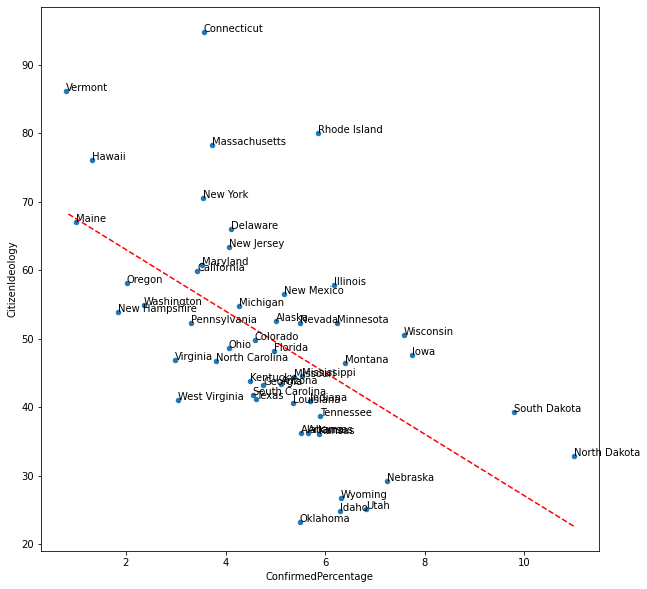

In [1275]:
x = df_cp['ConfirmedPercentage']
y = df_cp['CitizenIdeology']
ax = df_cp.plot(x='ConfirmedPercentage',y='CitizenIdeology',kind='scatter',figsize=(10,10))
# Add labels to each point
df_cp[['ConfirmedPercentage','CitizenIdeology','Province/State']].apply(lambda x: ax.text(*x),axis=1)

# Add a trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
# the line equation:
# print ("y=%.6fx+(%.6f)"%(z[0],z[1]))

# Display r squared value
import scipy
from scipy import stats
slope, intercept, r, p, std_err = scipy.stats.linregress(x, y)
print("R Squared: "+str(r**2))

While this correlation isn't perfect, it was much higher than I was expecting. An r squared value of 0.32 using real world data that is affected by many different factor is reasonably significant for our analysis. There certainly are some outliers, but overall this data follows a noticeable trend between political ideology and percent of confirmed cases. I believe this will be useful for our algorithm.

Next, let's take a look at population density to see if we can find any correlation between that and confirmed percentage of cases.

In [1276]:
# Data from: https://www.census.gov/data/tables/2010/dec/density-data-text.html
df_density = pd.read_csv('Data/pop_density.csv')
# df_density = df_density[['STATE_OR_REGION','2010_POPULATION','2010_DENSITY']]
df_density['2010_DENSITY'] = df_density['2010_DENSITY'].str.replace(',','')
df_density['2010_DENSITY'] = pd.to_numeric(df_density['2010_DENSITY'],errors='coerce')
df_density.head(100)

STATE_OR_REGION  1910_POPULATION  1920_POPULATION  1930_POPULATION  \
0          United States         92228531        106021568        123202660   
1                Alabama          2138093          2348174          2646248   
2                 Alaska            64356            55036            59278   
3                Arizona           204354           334162           435573   
4               Arkansas          1574449          1752204          1854482   
5             California          2377549          3426861          5677251   
6               Colorado           799024           939629          1035791   
7            Connecticut          1114756          1380631          1606903   
8               Delaware           202322           223003           238380   
9   District of Columbia           331069           437571           486869   
10               Florida           752619           968470          1468211   
11               Georgia          2609121          2895832          2908506   
12                Hawaii           191909           255912           368336   
13                 Idaho           325594           431866           445032   
14              Illinois          5638591          6485280          7630654   
15               Indiana          2700876          2930390          3238503   
16                  Iowa          2224771          2404021          2470939   
17                Kansas          1690949          1769257          1880999   
18              Kentucky          2289905          2416630          2614589   
19             Louisiana          1656388          1798509          2101593   
20                 Maine           742371           768014           797423   
21              Maryland          1295346          1449661          1631526   
22         Massachusetts          3366416          3852356          4249614   
23              Michigan          2810173          3668412          4842325   
24             Minnesota          2075708          2387125          2563953   
25           Mississippi          1797114          1790618          2009821   
26              Missouri          3293335          3404055          3629367   
27               Montana           376053           548889           537606   
28              Nebraska          1192214          1296372          1377963   
29                Nevada            81875            77407            91058   
30         New Hampshire           430572           443083           465293   
31            New Jersey          2537167          3155900          4041334   
32            New Mexico           327301           360350           423317   
33              New York          9113614         10385227         12588066   
34        North Carolina          2206287          2559123          3170276   
35          North Dakota           577056           646872           680845   
36                  Ohio          4767121          5759394          6646697   
37              Oklahoma          1657155          2028283          2396040   
38                Oregon           672765           783389           953786   
39          Pennsylvania          7665111          8720017          9631350   
40          Rhode Island           542610           604397           687497   
41        South Carolina          1515400          1683724          1738765   
42          South Dakota           583888           636547           692849   
43             Tennessee          2184789          2337885          2616556   
44                 Texas          3896542          4663228          5824715   
45                  Utah           373351           449396           507847   
46               Vermont           355956           352428           359611   
47              Virginia          2061612          2309187          2421851   
48            Washington          1141990          1356621          1563396   
49         West Virginia          1221119          1463701 

In [1278]:
df_cpd.head()

Province/State ObservationDate  ConfirmedPercentage  state    year  \
0   North Dakota      2020-12-06            10.987397   34.0  2015.0   
1   South Dakota      2020-12-06             9.796307   41.0  2015.0   
2           Iowa      2020-12-06             7.742031   15.0  2015.0   
3      Wisconsin      2020-12-06             7.581012   49.0  2015.0   
4       Nebraska      2020-12-06             7.235729   27.0  2015.0   

   CitizenIdeology  GovernmentIdeology  
0        32.864830           31.388329  
1        39.302322           29.607647  
2        47.608620           33.479546  
3        50.566242           22.858555  
4        29.198908           27.135815

R Squared: 0.05136597912659773


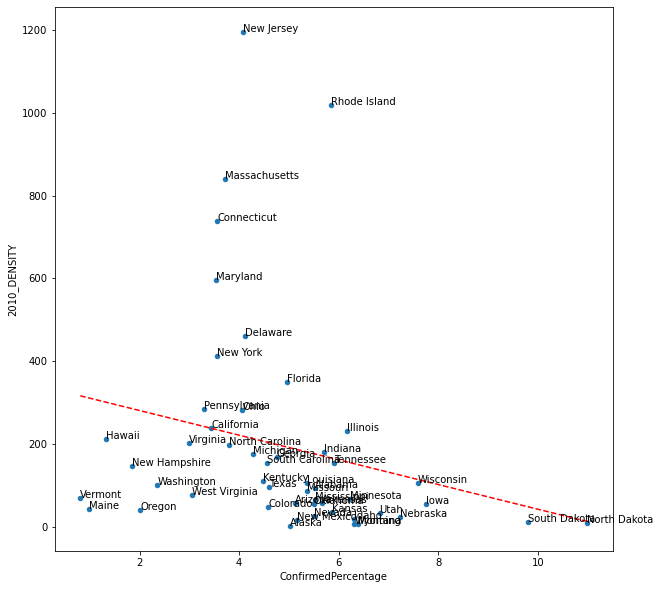

In [1279]:
# df confirmed partisan density
df_cpd = df_cp.copy()
df_density = df_density.rename(columns={'STATE_OR_REGION': 'Province/State'})
df_density = df_density[['Province/State','2010_DENSITY']]
df_cpd = df_cpd.merge(df_density, on='Province/State', how='inner')


x = df_cpd['ConfirmedPercentage']
y = df_cpd['2010_DENSITY']
ax = df_cpd.plot(x='ConfirmedPercentage',y='2010_DENSITY',kind='scatter',figsize=(10,10))
# Add labels to each point
df_cpd[['ConfirmedPercentage','2010_DENSITY','Province/State']].apply(lambda x: ax.text(*x),axis=1)

# Add a trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
# the line equation:
# print ("y=%.6fx+(%.6f)"%(z[0],z[1]))

# Display r squared value
import scipy
from scipy import stats
slope, intercept, r, p, std_err = scipy.stats.linregress(x, y)
print("R Squared: "+str(r**2))
# df_density.head(100)

Unfortunately, this r squared value is significantly lower than the correlation for political ideology. Our outlier data seems to be skewing our trendline as well. This is surprising because you might expext that more densely populated states to have higher rates since there are more people per unit area.

Next, we will import some data from census.gov with different data points and population numbers for each of them for each state. For this next graph, we will be looking at the average age of citizens in each state to see if we can find a correlation between average age and covid percentage rates.

In [1280]:
# Data from: https://www.census.gov/data/datasets/time-series/demo/popest/2010s-state-detail.html
# df_asr: df age sex race
df_asr = pd.read_csv('Data/sc-est2019-alldata6.csv')
# Remove columns we don't need
df_asr = df_asr[['NAME','SEX','ORIGIN','RACE','AGE','POPESTIMATE2019']]
# df_density = df_density[['STATE_OR_REGION','2010_POPULATION','2010_DENSITY']]
# df_density['2010_DENSITY'] = df_density['2010_DENSITY'].str.replace(',','')
# df_density['2010_DENSITY'] = pd.to_numeric(df_density['2010_DENSITY'],errors='coerce')
# df_asr.head(100)

In [1281]:
df_age = df_asr.copy()
df_age = df_age[df_age.SEX != 0]
df_age = df_age[df_age.ORIGIN != 0]
df_age = df_age[['NAME','AGE','POPESTIMATE2019']]
df_age = df_age.groupby(['NAME', 'AGE'], as_index=False).sum()
df_age['weighted'] = df_age['AGE'] * df_age['POPESTIMATE2019']
df_age = df_age.groupby(['NAME'], as_index=False).sum()
df_age['AverageAge'] = df_age['weighted'] / df_age['POPESTIMATE2019']
df_age = df_age[['NAME','AverageAge']]
df_age.head(10)

NAME  AverageAge
0               Alabama   39.482018
1                Alaska   36.330879
2               Arizona   39.170100
3              Arkansas   39.016298
4            California   38.033199
5              Colorado   38.106171
6           Connecticut   40.588005
7              Delaware   40.828502
8  District of Columbia   36.648714
9               Florida   41.874931

In [1282]:
df_cpa = df_cpd.copy()

df_age = df_age.rename(columns={'NAME': 'Province/State'})
df_cpa = df_cpa.merge(df_age, on='Province/State', how='inner')
df_cpa.head(100)

Province/State ObservationDate  ConfirmedPercentage  state    year  \
0     North Dakota      2020-12-06            10.987397   34.0  2015.0   
1     South Dakota      2020-12-06             9.796307   41.0  2015.0   
2             Iowa      2020-12-06             7.742031   15.0  2015.0   
3        Wisconsin      2020-12-06             7.581012   49.0  2015.0   
4         Nebraska      2020-12-06             7.235729   27.0  2015.0   
5             Utah      2020-12-06             6.818090   44.0  2015.0   
6          Montana      2020-12-06             6.389258   26.0  2015.0   
7          Wyoming      2020-12-06             6.312836   50.0  2015.0   
8            Idaho      2020-12-06             6.300959   12.0  2015.0   
9        Minnesota      2020-12-06             6.234042   23.0  2015.0   
10        Illinois      2020-12-06             6.168180   13.0  2015.0   
11       Tennessee      2020-12-06             5.906233   42.0  2015.0   
12          Kansas      2020-12-06             5.871616   16.0  2015.0   
13    Rhode Island      2020-12-05             5.852529   39.0  2015.0   
14         Indiana      2020-12-06             5.696092   14.0  2015.0   
15        Arkansas      2020-12-06             5.659122    4.0  2015.0   
16     Mississippi      2020-12-06             5.529430   24.0  2015.0   
17         Alabama      2020-12-06             5.520143    1.0  2015.0   
18          Nevada      2020-12-06             5.500480   28.0  2015.0   
19        Oklahoma      2020-12-06             5.493842   36.0  2015.0   
20        Missouri      2020-12-06             5.368742   25.0  2015.0   
21       Louisiana      2020-12-06             5.363001   18.0  2015.0   
22      New Mexico      2020-12-06             5.169923   31.0  2015.0   
23         Arizona      2020-12-06             5.113436    3.0  2015.0   
24          Alaska      2020-12-06             5.017966    2.0  2015.0   
25         Florida      2020-12-06             4.964637    9.0  2015.0   
26         Georgia      2020-12-06             4.754845   10.0  2015.0   
27           Texas      2020-12-06             4.608148   43.0  2015.0   
28        Colorado      2020-12-06             4.584301    6.0  2015.0   
29  South Carolina      2020-12-06             4.560873   40.0  2015.0   
30        Kentucky      2020-12-06             4.486116   17.0  2015.0   
31        Michigan      2020-12-06             4.269527   22.0  2015.0   
32        Delaware      2020-12-06             4.109640    8.0  2015.0   
33      New Jersey      2020-12-06             4.074186   30.0  2015.0   
34            Ohio      2020-12-06             4.061887   35.0  2015.0   
35  North Carolina      2020-12-06             3.801582   33.0  2015.0   
36   Massachusetts      2020-12-06             3.724581   21.0  2015.0   
37     Connecticut      2020-12-04             3.558826    7.0  2015.0   
38        New York      2020-12-06             3.553564   32.0  2015.0   
39        Maryland      2020-12-06             3.536860   20.0  2015.0   
40      California      2020-12-06             3.435852    5.0  2015.0   
41    Pennsylvania      2020-12-06             3.299285   38.0  2015.0   
42   West Virginia      2020-12-06             3.050175   48.0  2015.0   
43        Virginia      2020-12-06             2.991592   46.0  2015.0   
44      Washington      2020-12-06             2.356361   47.0  2015.0   
45          Oregon      2020-12-06             2.012019   37.0  2015.0   
46   New Hampshire      2020-12-06             1.842771   29.0  2015.0   
47          Hawaii      2020-12-06             1.320954   11.0  2015.0   
48           Maine      2020-12-06             0.994945   19.0  2015.0   
49         Vermont      2020-12-06             0.803737   45.0  2015.0   

    CitizenIdeology  GovernmentIdeology  2010_DENSITY  AverageAge  
0         32.864830           31.388329           9.7   37.518283  
1         39.302322           29.607647          10.7   38.462802  
2         47.608620      

R Squared: 0.256351432924362


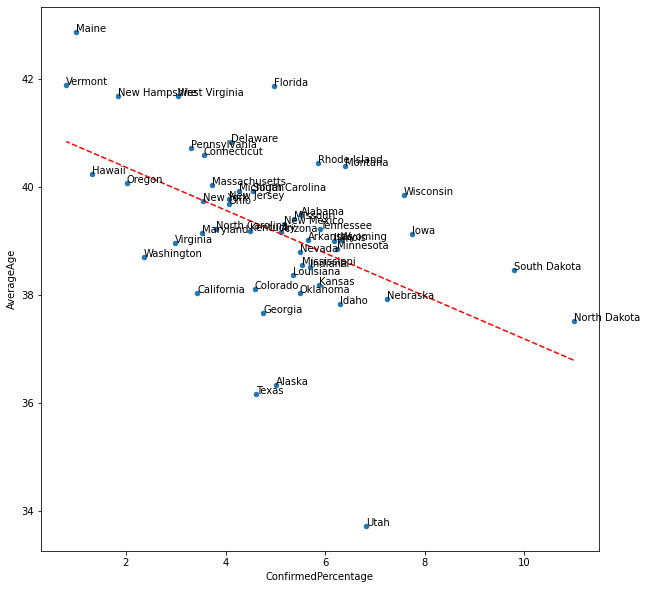

In [1283]:
x = df_cpa['ConfirmedPercentage']
y = df_cpa['AverageAge']
ax = df_cpa.plot(x='ConfirmedPercentage',y='AverageAge',kind='scatter',figsize=(10,10))
# Add labels to each point
df_cpa[['ConfirmedPercentage','AverageAge','Province/State']].apply(lambda x: ax.text(*x),axis=1)

# Add a trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
# the line equation:
# print ("y=%.6fx+(%.6f)"%(z[0],z[1]))

# Display r squared value
import scipy
from scipy import stats
slope, intercept, r, p, std_err = scipy.stats.linregress(x, y)
print("R Squared: "+str(r**2))
# df_cpa.head(100)

With an r squared value of 0.26, we are getting a correlation closer to what we had with the political ideology. There seems to be a correlation between younger average age and higher percentages of covid cases. This would seem to make sense, since younger people are less severely affected by covid and are more likely to expose themselves to more people. While we can't necessarily make any conclusions about why this correlation exists, it would seem that there is somewhat of a correlation between average age and confirmed case percentages.

While I don't expect to see any correlation with this next set of data, let's run the analysis since we alread have the data imported into our table. This next graph will be comparing the "average" sex (ratio of male to female with male being 1 and female being 2) of each state with its covid percentage rates.

In [1284]:
df_sex = df_asr.copy()
df_sex = df_sex[df_sex.SEX > 0]
df_sex = df_sex[df_sex.ORIGIN != 0]
# df_sex = df_sex[['NAME','SEX','AGE','POPESTIMATE2019']]
df_sex = df_sex.groupby(['NAME', 'SEX'], as_index=False).sum()
df_sex['weighted'] = df_sex['SEX'] * df_sex['POPESTIMATE2019']
df_sex = df_sex.groupby(['NAME'], as_index=False).sum()
df_sex['AverageSex'] = df_sex['weighted'] / df_sex['POPESTIMATE2019']
df_sex = df_sex[['NAME','AverageSex']]
df_sex.head(100)

NAME  AverageSex
0                Alabama    1.516739
1                 Alaska    1.478613
2                Arizona    1.503031
3               Arkansas    1.509042
4             California    1.502816
5               Colorado    1.496183
6            Connecticut    1.512124
7               Delaware    1.516522
8   District of Columbia    1.525736
9                Florida    1.511259
10               Georgia    1.513966
11                Hawaii    1.499927
12                 Idaho    1.498660
13              Illinois    1.508630
14               Indiana    1.506796
15                  Iowa    1.502047
16                Kansas    1.501703
17              Kentucky    1.507343
18             Louisiana    1.512336
19                 Maine    1.510411
20              Maryland    1.515544
21         Massachusetts    1.514608
22              Michigan    1.507500
23             Minnesota    1.501774
24           Mississippi    1.515383
25              Missouri    1.509133
26               Montana    1.496560
27              Nebraska    1.500390
28                Nevada    1.498458
29         New Hampshire    1.504459
30            New Jersey    1.511316
31            New Mexico    1.505238
32              New York    1.514338
33        North Carolina    1.513709
34          North Dakota    1.488189
35                  Ohio    1.509752
36              Oklahoma    1.504505
37                Oregon    1.504301
38          Pennsylvania    1.509892
39          Rhode Island    1.513221
40        South Carolina    1.515774
41          South Dakota    1.494995
42             Tennessee    1.512058
43                 Texas    1.503285
44                  Utah    1.496276
45               Vermont    1.505895
46              Virginia    1.507908
47            Washington    1.499404
48         West Virginia    1.504633
49             Wisconsin    1.502406
50               Wyoming    1.490755

In [1285]:
df_cpas = df_cpa.copy()

df_sex = df_sex.rename(columns={'NAME': 'Province/State'})
df_cpas = df_cpas.merge(df_sex, on='Province/State', how='inner')
df_cpas.head(100)

Province/State ObservationDate  ConfirmedPercentage  state    year  \
0     North Dakota      2020-12-06            10.987397   34.0  2015.0   
1     South Dakota      2020-12-06             9.796307   41.0  2015.0   
2             Iowa      2020-12-06             7.742031   15.0  2015.0   
3        Wisconsin      2020-12-06             7.581012   49.0  2015.0   
4         Nebraska      2020-12-06             7.235729   27.0  2015.0   
5             Utah      2020-12-06             6.818090   44.0  2015.0   
6          Montana      2020-12-06             6.389258   26.0  2015.0   
7          Wyoming      2020-12-06             6.312836   50.0  2015.0   
8            Idaho      2020-12-06             6.300959   12.0  2015.0   
9        Minnesota      2020-12-06             6.234042   23.0  2015.0   
10        Illinois      2020-12-06             6.168180   13.0  2015.0   
11       Tennessee      2020-12-06             5.906233   42.0  2015.0   
12          Kansas      2020-12-06             5.871616   16.0  2015.0   
13    Rhode Island      2020-12-05             5.852529   39.0  2015.0   
14         Indiana      2020-12-06             5.696092   14.0  2015.0   
15        Arkansas      2020-12-06             5.659122    4.0  2015.0   
16     Mississippi      2020-12-06             5.529430   24.0  2015.0   
17         Alabama      2020-12-06             5.520143    1.0  2015.0   
18          Nevada      2020-12-06             5.500480   28.0  2015.0   
19        Oklahoma      2020-12-06             5.493842   36.0  2015.0   
20        Missouri      2020-12-06             5.368742   25.0  2015.0   
21       Louisiana      2020-12-06             5.363001   18.0  2015.0   
22      New Mexico      2020-12-06             5.169923   31.0  2015.0   
23         Arizona      2020-12-06             5.113436    3.0  2015.0   
24          Alaska      2020-12-06             5.017966    2.0  2015.0   
25         Florida      2020-12-06             4.964637    9.0  2015.0   
26         Georgia      2020-12-06             4.754845   10.0  2015.0   
27           Texas      2020-12-06             4.608148   43.0  2015.0   
28        Colorado      2020-12-06             4.584301    6.0  2015.0   
29  South Carolina      2020-12-06             4.560873   40.0  2015.0   
30        Kentucky      2020-12-06             4.486116   17.0  2015.0   
31        Michigan      2020-12-06             4.269527   22.0  2015.0   
32        Delaware      2020-12-06             4.109640    8.0  2015.0   
33      New Jersey      2020-12-06             4.074186   30.0  2015.0   
34            Ohio      2020-12-06             4.061887   35.0  2015.0   
35  North Carolina      2020-12-06             3.801582   33.0  2015.0   
36   Massachusetts      2020-12-06             3.724581   21.0  2015.0   
37     Connecticut      2020-12-04             3.558826    7.0  2015.0   
38        New York      2020-12-06             3.553564   32.0  2015.0   
39        Maryland      2020-12-06             3.536860   20.0  2015.0   
40      California      2020-12-06             3.435852    5.0  2015.0   
41    Pennsylvania      2020-12-06             3.299285   38.0  2015.0   
42   West Virginia      2020-12-06             3.050175   48.0  2015.0   
43        Virginia      2020-12-06             2.991592   46.0  2015.0   
44      Washington      2020-12-06             2.356361   47.0  2015.0   
45          Oregon      2020-12-06             2.012019   37.0  2015.0   
46   New Hampshire      2020-12-06             1.842771   29.0  2015.0   
47          Hawaii      2020-12-06             1.320954   11.0  2015.0   
48           Maine      2020-12-06             0.994945   19.0  2015.0   
49         Vermont      2020-12-06             0.803737   45.0  2015.0   

    CitizenIdeology  GovernmentIdeology  2010_DENSITY  AverageAge  AverageSex  
0         32.864830           31.388329           9.7   37.518283    1.488189  
1         39.302322           29.607647          10.7   38.462802    

R Squared: 0.13591456000979601


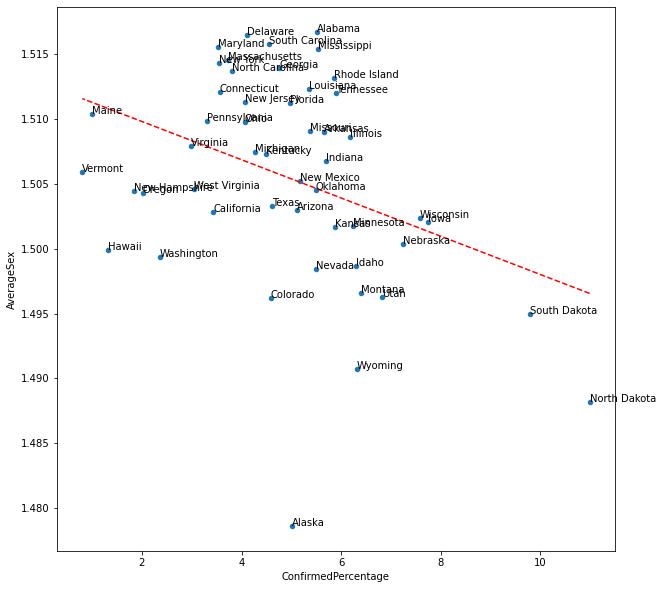

In [1286]:
x = df_cpas['ConfirmedPercentage']
y = df_cpas['AverageSex']
ax = df_cpas.plot(x='ConfirmedPercentage',y='AverageSex',kind='scatter',figsize=(10,10))
# Add labels to each point
df_cpas[['ConfirmedPercentage','AverageSex','Province/State']].apply(lambda x: ax.text(*x),axis=1)

# Add a trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
# the line equation:
# print ("y=%.6fx+(%.6f)"%(z[0],z[1]))

# Display r squared value
import scipy
from scipy import stats
slope, intercept, r, p, std_err = scipy.stats.linregress(x, y)
print("R Squared: "+str(r**2))
# df_cpa.head(100)

Unsurprisingly, there doesn't seem to be a significant correlation between sex and covid rates, however our r squared value is slightly higher than that of density at 0.14. If any correlation exists, it would seem to imply that high ratios of men related to higher percentages of covid.

Now let's take a look at average temperature and covid rates per state. I expect to see some correlation here, since warmer or colder weather would affect how much people are inside or outside.

In [1287]:
# Data from: https://corgis-edu.github.io/corgis/csv/weather/
df_weather = pd.read_csv('Data/weather.csv')

# Fix column labels and remove unnecessary data
df_weather['Station.State'] = df_weather['Station.State'].replace(['DE'],'Delaware')
df_weather['Station.State'] = df_weather['Station.State'].replace(['VA'],'Virginia')
df_weather = df_weather[df_weather['Station.State'] != 'Puerto Rico']

df_weather = df_weather.groupby(['Station.State'], as_index=False).mean()
df_weather = df_weather[['Station.State','Data.Temperature.Avg Temp']]

df_weather.head(100)

Station.State  Data.Temperature.Avg Temp
0          Alabama                  66.528302
1           Alaska                  41.157650
2          Arizona                  66.286792
3         Arkansas                  62.308176
4       California                  62.363363
5         Colorado                  49.273585
6      Connecticut                  53.396226
7         Delaware                  56.056604
8          Florida                  73.926101
9          Georgia                  66.220126
10          Hawaii                  76.384906
11           Idaho                  51.698113
12        Illinois                  53.377358
13         Indiana                  53.976415
14            Iowa                  50.796226
15          Kansas                  56.867925
16        Kentucky                  58.286792
17       Louisiana                  69.475096
18           Maine                  45.415094
19        Maryland                  56.971698
20   Massachusetts                  53.261438
21        Michigan                  48.002096
22       Minnesota                  44.675472
23     Mississippi                  66.474394
24        Missouri                  57.423181
25         Montana                  45.627787
26        Nebraska                  51.634434
27          Nevada                  55.628931
28   New Hampshire                  51.110000
29      New Jersey                  56.066038
30      New Mexico                  58.622642
31        New York                  51.040094
32  North Carolina                  61.770889
33    North Dakota                  45.166038
34            Ohio                  52.665768
35        Oklahoma                  61.716981
36          Oregon                  52.870283
37    Pennsylvania                  53.919137
38    Rhode Island                  53.037736
39  South Carolina                  65.188679
40    South Dakota                  48.415094
41       Tennessee                  60.802381
42           Texas                  68.181604
43            Utah                  55.698113
44         Vermont                  48.773585
45        Virginia                  58.876011
46      Washington                  51.366577
47   West Virginia                  55.023585
48       Wisconsin                  49.165094
49         Wyoming                  46.490566

In [1288]:
df_cpast = df_cpas.copy()

df_weather = df_weather.rename(columns={'Station.State': 'Province/State'})
df_weather = df_weather.rename(columns={'Data.Temperature.Avg Temp': 'AverageTemp'})
df_cpast = df_cpast.merge(df_weather, on='Province/State', how='inner')
df_cpast.head(100)

Province/State ObservationDate  ConfirmedPercentage  state    year  \
0     North Dakota      2020-12-06            10.987397   34.0  2015.0   
1     South Dakota      2020-12-06             9.796307   41.0  2015.0   
2             Iowa      2020-12-06             7.742031   15.0  2015.0   
3        Wisconsin      2020-12-06             7.581012   49.0  2015.0   
4         Nebraska      2020-12-06             7.235729   27.0  2015.0   
5             Utah      2020-12-06             6.818090   44.0  2015.0   
6          Montana      2020-12-06             6.389258   26.0  2015.0   
7          Wyoming      2020-12-06             6.312836   50.0  2015.0   
8            Idaho      2020-12-06             6.300959   12.0  2015.0   
9        Minnesota      2020-12-06             6.234042   23.0  2015.0   
10        Illinois      2020-12-06             6.168180   13.0  2015.0   
11       Tennessee      2020-12-06             5.906233   42.0  2015.0   
12          Kansas      2020-12-06             5.871616   16.0  2015.0   
13    Rhode Island      2020-12-05             5.852529   39.0  2015.0   
14         Indiana      2020-12-06             5.696092   14.0  2015.0   
15        Arkansas      2020-12-06             5.659122    4.0  2015.0   
16     Mississippi      2020-12-06             5.529430   24.0  2015.0   
17         Alabama      2020-12-06             5.520143    1.0  2015.0   
18          Nevada      2020-12-06             5.500480   28.0  2015.0   
19        Oklahoma      2020-12-06             5.493842   36.0  2015.0   
20        Missouri      2020-12-06             5.368742   25.0  2015.0   
21       Louisiana      2020-12-06             5.363001   18.0  2015.0   
22      New Mexico      2020-12-06             5.169923   31.0  2015.0   
23         Arizona      2020-12-06             5.113436    3.0  2015.0   
24          Alaska      2020-12-06             5.017966    2.0  2015.0   
25         Florida      2020-12-06             4.964637    9.0  2015.0   
26         Georgia      2020-12-06             4.754845   10.0  2015.0   
27           Texas      2020-12-06             4.608148   43.0  2015.0   
28        Colorado      2020-12-06             4.584301    6.0  2015.0   
29  South Carolina      2020-12-06             4.560873   40.0  2015.0   
30        Kentucky      2020-12-06             4.486116   17.0  2015.0   
31        Michigan      2020-12-06             4.269527   22.0  2015.0   
32        Delaware      2020-12-06             4.109640    8.0  2015.0   
33      New Jersey      2020-12-06             4.074186   30.0  2015.0   
34            Ohio      2020-12-06             4.061887   35.0  2015.0   
35  North Carolina      2020-12-06             3.801582   33.0  2015.0   
36   Massachusetts      2020-12-06             3.724581   21.0  2015.0   
37     Connecticut      2020-12-04             3.558826    7.0  2015.0   
38        New York      2020-12-06             3.553564   32.0  2015.0   
39        Maryland      2020-12-06             3.536860   20.0  2015.0   
40      California      2020-12-06             3.435852    5.0  2015.0   
41    Pennsylvania      2020-12-06             3.299285   38.0  2015.0   
42   West Virginia      2020-12-06             3.050175   48.0  2015.0   
43        Virginia      2020-12-06             2.991592   46.0  2015.0   
44      Washington      2020-12-06             2.356361   47.0  2015.0   
45          Oregon      2020-12-06             2.012019   37.0  2015.0   
46   New Hampshire      2020-12-06             1.842771   29.0  2015.0   
47          Hawaii      2020-12-06             1.320954   11.0  2015.0   
48           Maine      2020-12-06             0.994945   19.0  2015.0   
49         Vermont      2020-12-06             0.803737   45.0  2015.0   

    CitizenIdeology  GovernmentIdeology  2010_DENSITY  AverageAge  AverageSex  \
0         32.864830           31.388329           9.7   37.518283    1.488189   
1         39.302322           29.607647          10.7   38.462802  

R Squared: 0.032898004980701896


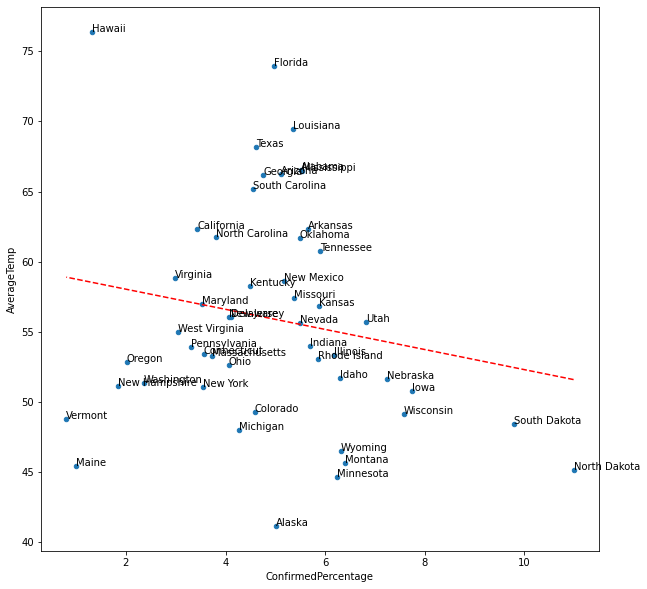

In [1289]:
x = df_cpast['ConfirmedPercentage']
y = df_cpast['AverageTemp']
ax = df_cpast.plot(x='ConfirmedPercentage',y='AverageTemp',kind='scatter',figsize=(10,10))
# Add labels to each point
df_cpast[['ConfirmedPercentage','AverageTemp','Province/State']].apply(lambda x: ax.text(*x),axis=1)

# Add a trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
# the line equation:
# print ("y=%.6fx+(%.6f)"%(z[0],z[1]))

# Display r squared value

slope, intercept, r, p, std_err = scipy.stats.linregress(x, y)
print("R Squared: "+str(r**2))

With an r squared of 0.03, average temperature has had the weakest correlation of all the data we looked at so far. This surprised me the most of all the data we looked at, since there seems to be no correlation at all. As I expained prior to doing this analysis, I had thought that the temperature's effect on how much time people spend indoors or outdoors would affect covid rates, but this does not seem to be the case.

Finally, let's actually run the machine learning model with our variables. We will use statsmodel to run out multiple linear regression. I will be fitting the model with some of the data that we took a look at above.
<br><br>
Let's start by running the model with just one variable to see how well it fits our data.

In [1290]:
X = df_cpa['CitizenIdeology']
y = df_cpa['ConfirmedPercentage']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ConfirmedPercentage   R-squared:                       0.324
Model:                             OLS   Adj. R-squared:                  0.310
Method:                  Least Squares   F-statistic:                     23.06
Date:                 Sun, 20 Dec 2020   Prob (F-statistic):           1.58e-05
Time:                         23:16:32   Log-Likelihood:                -94.881
No. Observations:                   50   AIC:                             193.8
Df Residuals:                       48   BIC:                             197.6
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               8.4885      0.789     10.756      0.000       6.902      10.075
CitizenIdeology    -0.0722      0.015     -4.802      0.000      -0.102      -0.042
==============================================================================
Omnibus:                        8.465   Durbin-Watson:                   0.498
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                7.607
Skew:                           0.830   Prob(JB):                       0.0223
Kurtosis:                       3.946   Cond. No.                         178.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now let's run it again, this time using multiple variables to see if we can improve our fit. Our last r squared was .32.

In [1291]:
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.formula.api as smf

x = df_cpast[['CitizenIdeology','AverageAge','AverageTemp']]
y = df_cpast['ConfirmedPercentage']
model = smf.ols(formula='ConfirmedPercentage ~ CitizenIdeology + AverageAge + AverageTemp', data=df_cpast).fit()

plt.rcParams["figure.figsize"] = (12,10)

model.summary()
# pred = model.predict(x)

# plt.scatter(y,pred)

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ConfirmedPercentage   R-squared:                       0.437
Model:                             OLS   Adj. R-squared:                  0.400
Method:                  Least Squares   F-statistic:                     11.89
Date:                 Sun, 20 Dec 2020   Prob (F-statistic):           6.89e-06
Time:                         23:16:32   Log-Likelihood:                -90.338
No. Observations:                   50   AIC:                             188.7
Df Residuals:                       46   BIC:                             196.3
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          24.7420      6.368      3.885      0.000      11.923      37.561
CitizenIdeology    -0.0567      0.017     -3.367      0.002      -0.091      -0.023
AverageAge         -0.3466      0.168     -2.061      0.045      -0.685      -0.008
AverageTemp        -0.0613      0.028     -2.178      0.035      -0.118      -0.005
==============================================================================
Omnibus:                        3.623   Durbin-Watson:                   0.815
Prob(Omnibus):                  0.163   Jarque-Bera (JB):                2.861
Skew:                           0.579   Prob(JB):                        0.239
Kurtosis:                       3.174   Cond. No.                     2.50e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1303]:
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.formula.api as smf

# df_cpast = df_cpast.rename()
df_cpast = df_cpast.rename(columns={'2010_DENSITY': 'Density'})

x = df_cpast[['CitizenIdeology','AverageAge','AverageTemp','Density','AverageSex']]
y = df_cpast['ConfirmedPercentage']
model = smf.ols(formula='ConfirmedPercentage ~ CitizenIdeology + AverageAge + AverageTemp + AverageSex + Density', data=df_cpast).fit()

plt.rcParams["figure.figsize"] = (12,10)

model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ConfirmedPercentage   R-squared:                       0.473
Model:                             OLS   Adj. R-squared:                  0.413
Method:                  Least Squares   F-statistic:                     7.885
Date:                 Mon, 21 Dec 2020   Prob (F-statistic):           2.27e-05
Time:                         00:42:22   Log-Likelihood:                -88.694
No. Observations:                   50   AIC:                             189.4
Df Residuals:                       44   BIC:                             200.9
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          61.7979     59.074      1.046      0.301     -57.258     180.854
CitizenIdeology    -0.0770      0.020     -3.757      0.001      -0.118      -0.036
AverageAge         -0.2724      0.188     -1.448      0.155      -0.651       0.107
AverageTemp        -0.0567      0.034     -1.651      0.106      -0.126       0.012
AverageSex        -26.3102     41.993     -0.627      0.534    -110.942      58.321
Density             0.0020      0.001      1.722      0.092      -0.000       0.004
==============================================================================
Omnibus:                        3.044   Durbin-Watson:                   0.817
Prob(Omnibus):                  0.218   Jarque-Bera (JB):                2.632
Skew:                           0.561   Prob(JB):                        0.268
Kurtosis:                       2.922   Cond. No.                     1.11e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

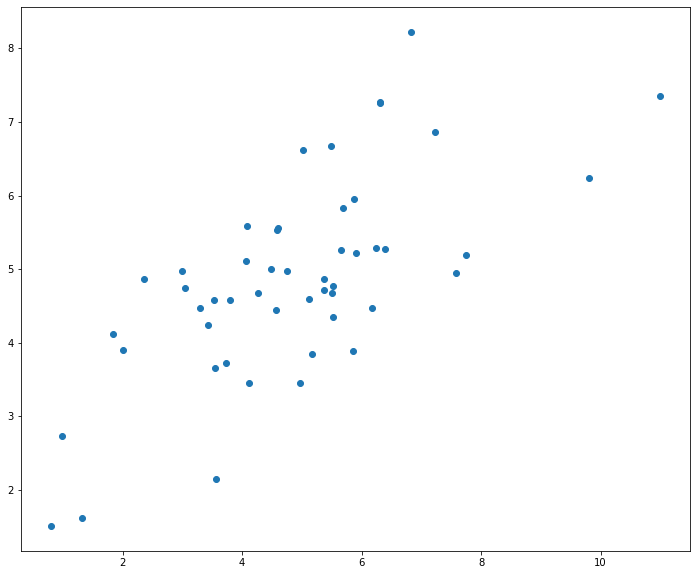

In [1321]:
pred = model.predict(x)

plt.scatter(y,pred)

# z = np.polyfit(y, pred, 1)
# p = np.poly1d(z)
# plt.plot(y,p(y),"r--")

# Conclusion